<img src="images/cs5228-header-title.png" />

### Group_work - Exploratory Data Analysis (EDA) & Data Preprocessing

This notebook covers Exploratory Data Analysis (EDA) and Data Preprocessing for the Singapore Used Car Price Prediction project.

In [117]:
%load_ext autoreload
%autoreload 2
from MissingFilledsilan import impute_missing_values_1 as impute_missing_values

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step 1: Data Exploration and Preprocessing

#### 1.1 Data Loading and Initial Exploration

loading the dataset and examining its structure:

In [118]:
# !pip install pandas numpy matplotlib seaborn scikit-learn fuzzywuzzy python-Levenshtein

In [119]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from fuzzywuzzy import process
import re
import os

# 设置图表风格
# plt.style.use('seaborn')

# load data
data = pd.read_csv('../../data/for-experiment-raw/for_test.csv',index_col=0)
# data = pd.read_csv('../../data/raw/test.csv',index_col=0)

print(data.shape)
data.head()

(5000, 28)


,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,...,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price
listing_id,,,,,,,,,,,,,,,,,,,,,
1312433,Porsche Macan GTS 3.0A PDK Panoramic Roof,porsche,macan,"price negotiable, comes with warranty. full se...",2017.0,NaN,10-nov-2017,suv,"parf car, premium ad car",auto,...,101573.0,98000.0,88463.0,131234.0,NaN,NaN,uncategorized,powered by turbocharged 3.0l v6 producing 355h...,"pasm, sports exhaust with valve, lane keeping ...",NaN
1326804,Honda Vezel Hybrid 1.5A X,honda,vezel,1.5l 4 cylinder inline dohc i-vtec hybrid engi...,2015.0,NaN,29-mar-2016,suv,"parf car, direct owner sale, hybrid cars",auto,...,10241.0,170000.0,22421.0,5000.0,NaN,NaN,uncategorized,"sport rims, auto brake hold, sport/eco mode, e...","best commute with economical consumption, with...",NaN
1273753,Jaguar E-PACE 2.0A S,jaguar,e-pace,all times serviced and maintained by agent wea...,2019.0,NaN,18-dec-2020,suv,parf car,auto,...,50560.0,NaN,29378.0,33130.0,NaN,NaN,uncategorized,"2.0l inline 4 turbocharged engine, 9 speed jag...","paddle shifters, electrical seat, knockdown re...",NaN
1282267,Audi Q5 2.0A TFSI Quattro (COE till 09/2030),audi,q5,"100% loan available, flexible financing and at...",2011.0,NaN,21-apr-2011,suv,"coe car, premium ad car, low mileage car",auto,...,22004.0,130000.0,45025.0,45025.0,NaN,NaN,uncategorized,2.ol inline 4 cylinder turbocharged producing ...,"keyless, factory fitted infotainment system, c...",NaN
1331985,BMW X1 sDrive18i xLine,bmw,x1,"sporty bmw x1 xline. new 7-speed dct gearbox, ...",2021.0,NaN,28-jan-2022,suv,parf car,auto,...,96162.0,27600.0,39089.0,46725.0,NaN,NaN,uncategorized,bmw twinpower turbo 3 cylinder engine with 140...,"idrive, bluetooth, auto front seats with drive...",NaN


#### 1.2 Understanding Each Attribute

##### 1.2.1 check the pysical meaning of each column
1. **listing_id**: Unique identifier for each car listing in the dataset.

2. **title**: A brief description of the car.

3. **make**: The brand of the car (e.g., Toyota, Honda).

4. **model**: The specific model of the car within a brand.

5. **description**: Detailed description of the car.

6. **manufactured**: The year the car was manufactured.

7. **original_reg_date**: Date of first registration of the car.

8. **reg_date**: Most recent registration date of the car.

9. **type_of_vehicle**: Category of the vehicle (e.g., sedan, SUV).

10. **category**: A more specific categorization of the vehicle.

11. **transmission**: Type of transmission of the car (e.g., automatic, manual).

12. **curb_weight**: Weight of the vehicle without passengers or cargo.

13. **power**: Engine power of the car, likely in horsepower or kilowatts.

14. **fuel_type**: Type of fuel the car uses (e.g., petrol, diesel, electric).

15. **engine_cap**: Engine capacity of the car, typically in liters or cc.

16. **no_of_owners**: Number of previous owners of the car.

17. **depreciation**: Rate at which the car loses value over time.

18. **coe**: Certificate of Entitlement, specific to Singapore's car market.

19. **road_tax**: Amount of road tax payable for the vehicle.

20. **dereg_value**: Value of the car if it were to be deregistered.

21. **mileage**: Distance the car has been driven.

22. **omv**: Open Market Value, the car's value before taxes.

23. **arf**: Additional Registration Fee, a tax imposed on vehicle registration.

24. **opc_scheme**: Off-Peak Car scheme, specific to Singapore's traffic management.

25. **lifespan**: Expected or remaining lifespan of the vehicle.

26. **eco_category**: Environmental category of the car.

27. **features**: List of car features or amenities.

28. **accessories**: Additional accessories or modifications to the car.

29. **indicative_price**: A suggested or estimated price for the car.

30. **price**: The actual price of the car.

##### 1.2.2 Deeper Understanding and Thought after Our First meeting(2024.9.25)

| Attribute | Data Type | Null Values | Characteristics | Processing Suggestions |
|-----------|-----------|-------------|-----------------|------------------------|
| listing_id | int64 | 0 | Unique identifier | Remove, not useful for analysis |
| title | object | 0 | Contains brand, model, engine info | Use to fill make and model gaps; possibly extract engine info |
| make | object | 1316 | 95 car brands | Fill nulls using title; consider grouping rare brands as "Other" |
| model | object | 0 | 799 car models | Use title to correct inaccuracies |
| description | object | 680 | Free text | Consider NLP for key info extraction; potential for new feature creation |
| manufactured | float64 | 7 | Manufacturing year | remove null row|
| original_reg_date | object | 24745 | Original registration date | Consider removing |
| reg_date | object | 0 | Registration date | Convert to vehicle age |
| type_of_vehicle | object | 0 | 11 vehicle types | One-hot encoding or ordinal encoding |
| category | object | 0 | 15 categories, multi-valued | One-hot encoding, treat "-" as a category |
| transmission | object | 0 | Auto/Manual | Binary encoding (0/1) |
| curb_weight | float64 | 307 | Vehicle weight (kg) | Mean imputation or consider removal |
| power | float64 | 2640 | Engine power (kW) | Mean imputation |
| fuel_type | object | 19121 | 5 fuel types | One-hot encoding, consider imputation using make+model |
| engine_cap | float64 | 596 | Engine capacity (cc) | Mean imputation, possibly group by engine type |
| no_of_owners | float64 | 18 | 1-6 previous owners | Mode imputation, maintain numerical relationship |
| depreciation | float64 | 507 | Annual depreciation (SGD) | Mean imputation or remove related rows |
| coe | int64 | 0 | Certificate of Entitlement value (SGD) | No processing needed, consider association with title |
| road_tax | float64 | 2632 | Annual road tax (SGD) | Mean imputation, possibly associate with engine size |
| dereg_value | float64 | 220 | Deregistration value (SGD) | Consider removal (high correlation with price) |
| mileage | float64 | 5304 | Kilometers driven | Consider removal or median imputation |
| omv | float64 | 64 | Open Market Value (SGD) | Mean imputation or remove related rows |
| arf | float64 | 174 | Additional Registration Fee (SGD) | Mean imputation or remove related rows |
| opc_scheme | object | 24838 | Off-Peak Car scheme | Consider removal or further investigation of impact |
| lifespan | object | 22671 | Vehicle scrappage date | Convert to remaining lifespan, consider predictive imputation |
| eco_category | object | 0 | Only "uncategorized" | Remove |
| features | object | 843 | Vehicle feature descriptions | Consider NLP for key info extraction |
| accessories | object | 3813 | Accessory descriptions | Consider NLP for key info extraction |
| indicative_price | float64 | 25000 | Guide price | Remove |
| price | float64 | 0 | Actual selling price (SGD) | Target variable, no processing needed |

Our thought process and considerations:
1. Unique Identifier: We decided to remove 'listing_id' as it's not useful for price prediction.
2. Title Information: We noted that 'title' contains valuable information about make and model, which can be used to fill gaps in those fields.
3. Make and Model Consistency: We observed discrepancies between 'title', 'make', and 'model'. We plan to use 'title' to correct and fill in 'make' (1316 nulls) and 'model' information.
4. Date Handling: We decided to convert 'reg_date' into vehicle age. We're considering removing 'original_reg_date' due to excessive missing values (24,745 nulls).
5. Categorical Variables: 
   - For 'type_of_vehicle' (11 types) and 'category' (15 types), we proposed one-hot encoding.
   - 'transmission' will be binary encoded (0/1) as it only has two categories.
6. Numerical Attributes:
   - We'll use mean imputation for 'curb_weight', 'power', 'engine_cap', 'depreciation', 'road_tax', 'omv', and 'arf'.
   - 'mileage' has many nulls (5,304); we're considering removal or median imputation.
7. Fuel Type: Despite high nulls (19,121), we'll keep 'fuel_type' and one-hot encode it, possibly using make+model for imputation.
8. Previous Owners: We'll use mode imputation for 'no_of_owners' and maintain its numerical relationship.
9. Text Fields: For 'description', 'features', and 'accessories', we're considering NLP techniques to extract key information.
10. Singapore-specific Features: 
    - We recognized the importance of 'coe' in the Singapore market.
    - We're considering removing 'opc_scheme' due to excessive nulls (24,838) but may investigate its impact further.
11. Correlated Features: We noted 'dereg_value' is highly correlated with price (0.92) and are considering its removal.
12. Useless Features: We decided to remove 'eco_category' (only one category) and 'indicative_price' (all null).
13. Target Variable: We identified 'price' as our prediction target, requiring no preprocessing.
14. Time-related Feature: For 'lifespan', we plan to convert it to remaining lifespan and consider predictive imputation for the many null values (22,671).

<svg id="mermaidChart163" width="100%" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" style="max-width: 830.312px; margin: 0px; color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px;" viewBox="0 0 830.3125 520.71875" role="graphics-document document" aria-roledescription="classDiagram"><style style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">#mermaidChart163{font-family:sans-serif;font-size:16px;fill:rgb(58, 71, 73);}#mermaidChart163 .error-icon{fill:#552222;}#mermaidChart163 .error-text{fill:#552222;stroke:#552222;}#mermaidChart163 .edge-thickness-normal{stroke-width:2px;}#mermaidChart163 .edge-thickness-thick{stroke-width:3.5px;}#mermaidChart163 .edge-pattern-solid{stroke-dasharray:0;}#mermaidChart163 .edge-pattern-dashed{stroke-dasharray:3;}#mermaidChart163 .edge-pattern-dotted{stroke-dasharray:2;}#mermaidChart163 .marker{fill:#333333;stroke:#333333;}#mermaidChart163 .marker.cross{stroke:#333333;}#mermaidChart163 svg{font-family:sans-serif;font-size:16px;}#mermaidChart163 g.classGroup text{fill:#9370DB;stroke:none;font-family:sans-serif;font-size:10px;}#mermaidChart163 g.classGroup text .title{font-weight:bolder;}#mermaidChart163 .nodeLabel,#mermaidChart163 .edgeLabel{color:#131300;}#mermaidChart163 .edgeLabel .label rect{fill:#ECECFF;}#mermaidChart163 .label text{fill:#131300;}#mermaidChart163 .edgeLabel .label span{background:#ECECFF;}#mermaidChart163 .classTitle{font-weight:bolder;}#mermaidChart163 .node rect,#mermaidChart163 .node circle,#mermaidChart163 .node ellipse,#mermaidChart163 .node polygon,#mermaidChart163 .node path{fill:#ECECFF;stroke:#9370DB;stroke-width:1px;}#mermaidChart163 .divider{stroke:#9370DB;stroke-width:1;}#mermaidChart163 g.clickable{cursor:pointer;}#mermaidChart163 g.classGroup rect{fill:#ECECFF;stroke:#9370DB;}#mermaidChart163 g.classGroup line{stroke:#9370DB;stroke-width:1;}#mermaidChart163 .classLabel .box{stroke:none;stroke-width:0;fill:#ECECFF;opacity:0.5;}#mermaidChart163 .classLabel .label{fill:#9370DB;font-size:10px;}#mermaidChart163 .relation{stroke:#333333;stroke-width:1;fill:none;}#mermaidChart163 .dashed-line{stroke-dasharray:3;}#mermaidChart163 .dotted-line{stroke-dasharray:1 2;}#mermaidChart163 #compositionStart,#mermaidChart163 .composition{fill:#333333!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #compositionEnd,#mermaidChart163 .composition{fill:#333333!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #dependencyStart,#mermaidChart163 .dependency{fill:#333333!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #dependencyStart,#mermaidChart163 .dependency{fill:#333333!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #extensionStart,#mermaidChart163 .extension{fill:transparent!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #extensionEnd,#mermaidChart163 .extension{fill:transparent!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #aggregationStart,#mermaidChart163 .aggregation{fill:transparent!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #aggregationEnd,#mermaidChart163 .aggregation{fill:transparent!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #lollipopStart,#mermaidChart163 .lollipop{fill:#ECECFF!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 #lollipopEnd,#mermaidChart163 .lollipop{fill:#ECECFF!important;stroke:#333333!important;stroke-width:1;}#mermaidChart163 .edgeTerminals{font-size:11px;line-height:initial;}#mermaidChart163 .classTitleText{text-anchor:middle;font-size:18px;fill:#333;}#mermaidChart163 :root{--mermaid-alt-font-family:sans-serif;}</style><g style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-aggregationStart" class="marker aggregation classDiagram" refX="18" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-aggregationEnd" class="marker aggregation classDiagram" refX="1" refY="7" markerWidth="20" markerHeight="28" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-extensionStart" class="marker extension classDiagram" refX="18" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 1,7 L18,13 V 1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-extensionEnd" class="marker extension classDiagram" refX="1" refY="7" markerWidth="20" markerHeight="28" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 1,1 V 13 L18,7 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-compositionStart" class="marker composition classDiagram" refX="18" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-compositionEnd" class="marker composition classDiagram" refX="1" refY="7" markerWidth="20" markerHeight="28" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-dependencyStart" class="marker dependency classDiagram" refX="6" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 5,7 L9,13 L1,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-dependencyEnd" class="marker dependency classDiagram" refX="13" refY="7" markerWidth="20" markerHeight="28" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M 18,7 L9,13 L14,7 L9,1 Z" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(51, 51, 51); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></path></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-lollipopStart" class="marker lollipop classDiagram" refX="13" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><circle stroke="currentColor" fill="transparent" cx="7" cy="7" r="6" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(58, 71, 73); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></circle></marker></defs><defs style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><marker id="mermaidChart163_classDiagram-lollipopEnd" class="marker lollipop classDiagram" refX="1" refY="7" markerWidth="190" markerHeight="240" orient="auto" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><circle stroke="currentColor" fill="transparent" cx="7" cy="7" r="6" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgba(0, 0, 0, 0); stroke: rgb(58, 71, 73); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></circle></marker></defs><g class="root" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="clusters" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></g><g class="edgePaths" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><path d="M337.716,92.94L298.053,103.58C258.389,114.22,179.062,135.501,139.398,155.24C99.734,174.979,99.734,193.177,99.734,202.276L99.734,211.375" id="id_PricePrediction_VeryHighImportance_1" class="  edge-pattern-solid relation" style="fill: none; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: 0px; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" marker-start="url(#mermaidChart163_classDiagram-extensionStart)"></path><path d="M341.048,135.983L336.716,139.449C332.384,142.916,323.721,149.848,319.389,157.482C315.057,165.115,315.057,173.448,315.057,177.615L315.057,181.781" id="id_PricePrediction_HighImportance_2" class="  edge-pattern-solid relation" style="fill: none; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: 0px; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" marker-start="url(#mermaidChart163_classDiagram-extensionStart)"></path><path d="M506.228,135.983L510.56,139.449C514.892,142.916,523.555,149.848,527.887,159.948C532.219,170.047,532.219,183.313,532.219,189.945L532.219,196.578" id="id_PricePrediction_ModerateImportance_3" class="  edge-pattern-solid relation" style="fill: none; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: 0px; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" marker-start="url(#mermaidChart163_classDiagram-extensionStart)"></path><path d="M509.565,92.835L549.48,103.492C589.394,114.15,669.223,135.466,709.138,162.621C749.052,189.776,749.052,222.771,749.052,239.268L749.052,255.766" id="id_PricePrediction_LowImportance_4" class="  edge-pattern-solid relation" style="fill: none; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); stroke: rgb(51, 51, 51); stroke-width: 1px; opacity: 1; stroke-dasharray: 0px; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" marker-start="url(#mermaidChart163_classDiagram-extensionStart)"></path></g><g class="edgeLabels" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="edgeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="label" transform="translate(0, 0)" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="edgeLabel" style="background-color: rgb(236, 236, 255); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject></g></g><g class="edgeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="label" transform="translate(0, 0)" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="edgeLabel" style="background-color: rgb(236, 236, 255); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject></g></g><g class="edgeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="label" transform="translate(0, 0)" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="edgeLabel" style="background-color: rgb(236, 236, 255); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject></g></g><g class="edgeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="label" transform="translate(0, 0)" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="edgeLabel" style="background-color: rgb(236, 236, 255); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject></g></g></g><g class="nodes" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><g class="node default" id="classId-PricePrediction-825" data-node="true" data-id="PricePrediction" transform="translate(423.6380271911621, 69.890625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-68.53646087646484" y="-61.890625" width="137.0729217529297" height="123.78125"></rect><line class="divider" x1="-68.53646087646484" x2="68.53646087646484" y1="-24.296875" y2="-24.296875" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-68.53646087646484" x2="68.53646087646484" y1="50.890625" y2="50.890625" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="122.07292175292969" height="25.59375" transform="translate( -61.036460876464844, -54.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">PricePrediction</span></div></foreignObject><foreignObject width="62.71875" height="25.59375" transform="translate( -61.036460876464844, -12.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">train.csv</span></div></foreignObject><foreignObject width="55.958335876464844" height="25.59375" transform="translate( -61.036460876464844, 16.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">test.csv</span></div></foreignObject></g></g><g class="node default" id="classId-VeryHighImportance-826" data-node="true" data-id="VeryHighImportance" transform="translate(99.734375, 347.25)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-91.734375" y="-135.875" width="183.46875" height="271.75"></rect><line class="divider" x1="-91.734375" x2="91.734375" y1="-98.28125" y2="-98.28125" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-91.734375" x2="91.734375" y1="95.28125" y2="95.28125" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="168.46875" height="25.59375" transform="translate( -84.234375, -128.375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">VeryHighImportance</span></div></foreignObject><foreignObject width="41.28125" height="25.59375" transform="translate( -84.234375, -86.78125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">make</span></div></foreignObject><foreignObject width="48.739585876464844" height="25.59375" transform="translate( -84.234375, -57.1875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">model</span></div></foreignObject><foreignObject width="106.98958587646484" height="25.59375" transform="translate( -84.234375, -27.59375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">manufactured</span></div></foreignObject><foreignObject width="27.28125" height="25.59375" transform="translate( -84.234375, 2)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">coe</span></div></foreignObject><foreignObject width="33.5625" height="25.59375" transform="translate( -84.234375, 31.59375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">omv</span></div></foreignObject><foreignObject width="20.83333396911621" height="25.59375" transform="translate( -84.234375, 61.1875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">arf</span></div></foreignObject><foreignObject width="94.34375" height="25.59375" transform="translate( -84.234375, 102.78125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">price(target)</span></div></foreignObject></g></g><g class="node default" id="classId-HighImportance-827" data-node="true" data-id="HighImportance" transform="translate(315.0572967529297, 347.25)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-73.58854675292969" y="-165.46875" width="147.17709350585938" height="330.9375"></rect><line class="divider" x1="-73.58854675292969" x2="73.58854675292969" y1="-127.875" y2="-127.875" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-73.58854675292969" x2="73.58854675292969" y1="154.46875" y2="154.46875" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="132.17709350585938" height="25.59375" transform="translate( -66.08854675292969, -157.96875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">HighImportance</span></div></foreignObject><foreignObject width="66.35417175292969" height="25.59375" transform="translate( -66.08854675292969, -116.375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">reg_date</span></div></foreignObject><foreignObject width="116.32292175292969" height="25.59375" transform="translate( -66.08854675292969, -86.78125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">type_of_vehicle</span></div></foreignObject><foreignObject width="48.125" height="25.59375" transform="translate( -66.08854675292969, -57.1875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">power</span></div></foreignObject><foreignObject width="69.64583587646484" height="25.59375" transform="translate( -66.08854675292969, -27.59375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">fuel_type</span></div></foreignObject><foreignObject width="86.625" height="25.59375" transform="translate( -66.08854675292969, 2)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">engine_cap</span></div></foreignObject><foreignObject width="95.875" height="25.59375" transform="translate( -66.08854675292969, 31.59375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">depreciation</span></div></foreignObject><foreignObject width="60.75" height="25.59375" transform="translate( -66.08854675292969, 61.1875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">mileage</span></div></foreignObject><foreignObject width="59.25" height="25.59375" transform="translate( -66.08854675292969, 90.78125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">lifespan</span></div></foreignObject><foreignObject width="61.65625" height="25.59375" transform="translate( -66.08854675292969, 120.375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">features</span></div></foreignObject></g></g><g class="node default" id="classId-ModerateImportance-828" data-node="true" data-id="ModerateImportance" transform="translate(532.2187576293945, 347.25)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-93.57292175292969" y="-150.671875" width="187.14584350585938" height="301.34375"></rect><line class="divider" x1="-93.57292175292969" x2="93.57292175292969" y1="-113.078125" y2="-113.078125" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-93.57292175292969" x2="93.57292175292969" y1="139.671875" y2="139.671875" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="172.14584350585938" height="25.59375" transform="translate( -86.07292175292969, -143.171875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">ModerateImportance</span></div></foreignObject><foreignObject width="67.45833587646484" height="25.59375" transform="translate( -86.07292175292969, -101.578125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">category</span></div></foreignObject><foreignObject width="96.53125" height="25.59375" transform="translate( -86.07292175292969, -71.984375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">transmission</span></div></foreignObject><foreignObject width="93.3125" height="25.59375" transform="translate( -86.07292175292969, -42.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">curb_weight</span></div></foreignObject><foreignObject width="105.15625" height="25.59375" transform="translate( -86.07292175292969, -12.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">no_of_owners</span></div></foreignObject><foreignObject width="65" height="25.59375" transform="translate( -86.07292175292969, 16.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">road_tax</span></div></foreignObject><foreignObject width="94.02083587646484" height="25.59375" transform="translate( -86.07292175292969, 46.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">opc_scheme</span></div></foreignObject><foreignObject width="101.90625" height="25.59375" transform="translate( -86.07292175292969, 75.984375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">eco_category</span></div></foreignObject><foreignObject width="85.8125" height="25.59375" transform="translate( -86.07292175292969, 105.578125)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">accessories</span></div></foreignObject></g></g><g class="node default" id="classId-LowImportance-829" data-node="true" data-id="LowImportance" transform="translate(749.0520935058594, 347.25)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><rect style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(236, 236, 255); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;" class="outer title-state" x="-73.26042175292969" y="-91.484375" width="146.52084350585938" height="182.96875"></rect><line class="divider" x1="-73.26042175292969" x2="73.26042175292969" y1="-53.890625" y2="-53.890625" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><line class="divider" x1="-73.26042175292969" x2="73.26042175292969" y1="80.484375" y2="80.484375" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: rgb(147, 112, 219); stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></line><g class="label" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><foreignObject width="0" height="0" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"></span></div></foreignObject><foreignObject class="classTitle" width="126.22917175292969" height="25.59375" transform="translate( -63.114585876464844, -83.984375)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">LowImportance</span></div></foreignObject><foreignObject width="67.90625" height="25.59375" transform="translate( -65.76042175292969, -42.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">listing_id</span></div></foreignObject><foreignObject width="29.52083396911621" height="25.59375" transform="translate( -65.76042175292969, -12.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">title</span></div></foreignObject><foreignObject width="85.58333587646484" height="25.59375" transform="translate( -65.76042175292969, 16.796875)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">description</span></div></foreignObject><foreignObject width="131.52084350585938" height="25.59375" transform="translate( -65.76042175292969, 46.390625)" style="background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: inline-block; white-space: nowrap; background-color: rgba(0, 0, 0, 0); color: rgb(58, 71, 73); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;"><span class="nodeLabel" style="background-color: rgba(0, 0, 0, 0); color: rgb(19, 19, 0); fill: rgb(58, 71, 73); stroke: none; stroke-width: 1px; opacity: 1; stroke-dasharray: none; font-size: 16px; font-family: sans-serif; text-anchor: start; padding: 0px; margin: 0px;">original_reg_date</span></div></foreignObject></g></g></g></g></g></svg>

## 2.Preprocessing

In [120]:
# print the columns
print("\nall column names:")
print(data.columns.tolist())


all column names:
['title', 'make', 'model', 'description', 'manufactured', 'original_reg_date', 'reg_date', 'type_of_vehicle', 'category', 'transmission', 'curb_weight', 'power', 'fuel_type', 'engine_cap', 'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'opc_scheme', 'lifespan', 'eco_category', 'features', 'accessories', 'indicative_price']


### 2.1 Preprocessing column by column

### 2.1.1 process title

In [121]:
# 2. clean the complex columns
def clean_title(title):
    # extract the COE information
    coe_match = re.search(r'\(COE till (\d{2}/\d{4})\)', title)
    coe_expiry = coe_match.group(1) if coe_match else None
    # remove the COE information
    title = re.sub(r'\(COE till \d{2}/\d{4}\)', '', title)
    # remove the year, capacity and mileage information
    title = re.sub(r'\b\d{4}\b|\d+(\.\d+)?(cc|l|litre|liter)|[0-9]+\s*(km|kms)', '', title, flags=re.IGNORECASE)
    # remove common words like 'auto', 'manual', 'diesel', 'petrol
    title = re.sub(r'\b(auto|manual|diesel|petrol)\b', '', title, flags=re.IGNORECASE)
    # remove extra whitespaces
    return ' '.join(title.split())

def find_best_match(x, choices, cutoff=80):
    best_match = process.extractOne(x, choices)
    return best_match[0] if best_match and best_match[1] >= cutoff else x

# clean title
data['cleaned_title'] = data['title'].apply(clean_title)


# delete the original title column
data = data.drop('title', axis=1)

In [122]:
data.head()

,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,cleaned_title
listing_id,,,,,,,,,,,,,,,,,,,,,
1312433,porsche,macan,"price negotiable, comes with warranty. full se...",2017.0,NaN,10-nov-2017,suv,"parf car, premium ad car",auto,1970.0,...,98000.0,88463.0,131234.0,NaN,NaN,uncategorized,powered by turbocharged 3.0l v6 producing 355h...,"pasm, sports exhaust with valve, lane keeping ...",NaN,Porsche Macan GTS 3.0A PDK Panoramic Roof
1326804,honda,vezel,1.5l 4 cylinder inline dohc i-vtec hybrid engi...,2015.0,NaN,29-mar-2016,suv,"parf car, direct owner sale, hybrid cars",auto,1280.0,...,170000.0,22421.0,5000.0,NaN,NaN,uncategorized,"sport rims, auto brake hold, sport/eco mode, e...","best commute with economical consumption, with...",NaN,Honda Vezel Hybrid 1.5A X
1273753,jaguar,e-pace,all times serviced and maintained by agent wea...,2019.0,NaN,18-dec-2020,suv,parf car,auto,1757.0,...,NaN,29378.0,33130.0,NaN,NaN,uncategorized,"2.0l inline 4 turbocharged engine, 9 speed jag...","paddle shifters, electrical seat, knockdown re...",NaN,Jaguar E-PACE 2.0A S
1282267,audi,q5,"100% loan available, flexible financing and at...",2011.0,NaN,21-apr-2011,suv,"coe car, premium ad car, low mileage car",auto,1740.0,...,130000.0,45025.0,45025.0,NaN,NaN,uncategorized,2.ol inline 4 cylinder turbocharged producing ...,"keyless, factory fitted infotainment system, c...",NaN,Audi Q5 2.0A TFSI Quattro
1331985,bmw,x1,"sporty bmw x1 xline. new 7-speed dct gearbox, ...",2021.0,NaN,28-jan-2022,suv,parf car,auto,1435.0,...,27600.0,39089.0,46725.0,NaN,NaN,uncategorized,bmw twinpower turbo 3 cylinder engine with 140...,"idrive, bluetooth, auto front seats with drive...",NaN,BMW X1 sDrive18i xLine


### 2.1.2 process make

In [123]:
# process make
# print("the make num:", data['make'].isnull().sum())

# # gain the known makes
# known_makes = data['make'].dropna().unique()

# # fill the missing values
# data.loc[data['make'].isnull(), 'make'] = data.loc[data['make'].isnull(), 'cleaned_title'].apply(
#     lambda x: find_best_match(x.split()[0], known_makes)
# )


# print("the make num after cleaning:", data['make'].isnull().sum())

# plt.figure(figsize=(15, 8))
# data['make'].value_counts().head(20).plot(kind='bar')
# plt.title('Top 20 Car Brands (After Advanced Filling)')
# plt.xlabel('Brand')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()

#### 2.1.3 process model

In [124]:
# process model
# print("\nnum of lack model:", data['model'].isnull().sum())

# # gain the known models
# known_models = data['model'].dropna().unique()

# # fill the missing values
# data['model'] = data['model'].apply(lambda x: clean_title(str(x)) if pd.notnull(x) else x)

# # fill the missing values
# for make in data['make'].unique():
#     make_models = data[data['make'] == make]['model'].dropna().unique()
#     mask = (data['make'] == make) & (data['model'].isnull())
#     data.loc[mask, 'model'] = data.loc[mask, 'cleaned_title'].apply(
#         lambda x: find_best_match(' '.join(x.split()[1:]), make_models)
#     )

# print("num of unkown model after clean:", data['model'].isnull().sum())

# plt.figure(figsize=(15, 8))
# data['model'].value_counts().head(20).plot(kind='bar')
# plt.title('Top 20 Car Models (After Advanced Filling)')
# plt.xlabel('Model')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()




# # drop the cleaned_title column
# data = data.drop('cleaned_title', axis=1)
# final_row_count = len(data)
# print(f"Final number of rows: {final_row_count}")


#### 2.1.4 process discription

In [125]:
# drop discription
data = data.drop('description', axis=1)
data.head()

,make,model,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,cleaned_title
listing_id,,,,,,,,,,,,,,,,,,,,,
1312433,porsche,macan,2017.0,NaN,10-nov-2017,suv,"parf car, premium ad car",auto,1970.0,265.0,...,98000.0,88463.0,131234.0,NaN,NaN,uncategorized,powered by turbocharged 3.0l v6 producing 355h...,"pasm, sports exhaust with valve, lane keeping ...",NaN,Porsche Macan GTS 3.0A PDK Panoramic Roof
1326804,honda,vezel,2015.0,NaN,29-mar-2016,suv,"parf car, direct owner sale, hybrid cars",auto,1280.0,112.0,...,170000.0,22421.0,5000.0,NaN,NaN,uncategorized,"sport rims, auto brake hold, sport/eco mode, e...","best commute with economical consumption, with...",NaN,Honda Vezel Hybrid 1.5A X
1273753,jaguar,e-pace,2019.0,NaN,18-dec-2020,suv,parf car,auto,1757.0,147.0,...,NaN,29378.0,33130.0,NaN,NaN,uncategorized,"2.0l inline 4 turbocharged engine, 9 speed jag...","paddle shifters, electrical seat, knockdown re...",NaN,Jaguar E-PACE 2.0A S
1282267,audi,q5,2011.0,NaN,21-apr-2011,suv,"coe car, premium ad car, low mileage car",auto,1740.0,155.0,...,130000.0,45025.0,45025.0,NaN,NaN,uncategorized,2.ol inline 4 cylinder turbocharged producing ...,"keyless, factory fitted infotainment system, c...",NaN,Audi Q5 2.0A TFSI Quattro
1331985,bmw,x1,2021.0,NaN,28-jan-2022,suv,parf car,auto,1435.0,100.0,...,27600.0,39089.0,46725.0,NaN,NaN,uncategorized,bmw twinpower turbo 3 cylinder engine with 140...,"idrive, bluetooth, auto front seats with drive...",NaN,BMW X1 sDrive18i xLine


#### 2.1.5 process mnufactures

In [126]:
data['manufactured'] = data['manufactured'].astype('Int64')
missing_count = sum(data['manufactured'].isnull())
print(f"Before processing, missing manufactured value: {missing_count}")

Before processing, missing manufactured value: 4


In [127]:
data['manufactured'] = pd.to_numeric(data['manufactured'], errors='coerce')

# 打印初始缺失值数量
initial_missing = data['manufactured'].isnull().sum()
print(f"Initial missing manufactured values: {initial_missing}")

# 定义一个函数来找到最相似的类别
def find_similar_category(row, data):
    # 这里您需要定义相似性的标准。例如，我们可以使用 'type_of_vehicle'
    vehicle_type = row['type_of_vehicle']
    
    # 找到同类型车辆中价格最接近的
    similar = data[data['type_of_vehicle'] == vehicle_type].copy()
    return similar.iloc[0]['manufactured']

# 对于缺失的 'manufactured' 值，找到并填充相似类别的平均值
mask = data['manufactured'].isnull()
data.loc[mask, 'manufactured'] = data[mask].apply(lambda row: find_similar_category(row, data), axis=1)

# 如果还有缺失值，用该类型车辆的平均制造年份填充
mean_manufactured = data.groupby('type_of_vehicle')['manufactured'].transform('mean')
data['manufactured'].fillna(mean_manufactured, inplace=True)

# 如果仍然有缺失值（极少数情况），用整体平均值填充
data['manufactured'].fillna(data['manufactured'].mean(), inplace=True)

# 将 'manufactured' 转换为整数类型
data['manufactured'] = data['manufactured'].astype('Int64')

# 打印处理后的缺失值数量
final_missing = data['manufactured'].isnull().sum()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")

Initial missing manufactured values: 4
Final number of rows: 5000


#### 2.1.6 process original_reg_date	

In [128]:
# drop the original_reg_date	
data = data.drop('original_reg_date', axis=1)
data.head()

,make,model,manufactured,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,cleaned_title
listing_id,,,,,,,,,,,,,,,,,,,,,
1312433,porsche,macan,2017,10-nov-2017,suv,"parf car, premium ad car",auto,1970.0,265.0,NaN,...,98000.0,88463.0,131234.0,NaN,NaN,uncategorized,powered by turbocharged 3.0l v6 producing 355h...,"pasm, sports exhaust with valve, lane keeping ...",NaN,Porsche Macan GTS 3.0A PDK Panoramic Roof
1326804,honda,vezel,2015,29-mar-2016,suv,"parf car, direct owner sale, hybrid cars",auto,1280.0,112.0,petrol-electric,...,170000.0,22421.0,5000.0,NaN,NaN,uncategorized,"sport rims, auto brake hold, sport/eco mode, e...","best commute with economical consumption, with...",NaN,Honda Vezel Hybrid 1.5A X
1273753,jaguar,e-pace,2019,18-dec-2020,suv,parf car,auto,1757.0,147.0,NaN,...,NaN,29378.0,33130.0,NaN,NaN,uncategorized,"2.0l inline 4 turbocharged engine, 9 speed jag...","paddle shifters, electrical seat, knockdown re...",NaN,Jaguar E-PACE 2.0A S
1282267,audi,q5,2011,21-apr-2011,suv,"coe car, premium ad car, low mileage car",auto,1740.0,155.0,NaN,...,130000.0,45025.0,45025.0,NaN,NaN,uncategorized,2.ol inline 4 cylinder turbocharged producing ...,"keyless, factory fitted infotainment system, c...",NaN,Audi Q5 2.0A TFSI Quattro
1331985,bmw,x1,2021,28-jan-2022,suv,parf car,auto,1435.0,100.0,NaN,...,27600.0,39089.0,46725.0,NaN,NaN,uncategorized,bmw twinpower turbo 3 cylinder engine with 140...,"idrive, bluetooth, auto front seats with drive...",NaN,BMW X1 sDrive18i xLine


#### 2.1.6 process reg_date	and create vehicle age

In [129]:
# 5. process the reg_date
data['reg_date'] = pd.to_datetime(data['reg_date'])
# plt.figure(figsize=(12, 6))
# # sns.histplot(data['reg_date'].dt.year, kde=True, bins=30)
# plt.title('Distribution of Registration Year')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.show()

# compute the vehicle age
current_date = pd.Timestamp.now()
data['vehicle_age'] = (current_date - data['reg_date']).astype('<m8[Y]')
data = data.drop('reg_date', axis=1)
# data = data.drop('manufactured', axis=1)
data.head()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")


Final number of rows: 5000


### 2.1.7 Process 'type_of_vehicle' column

suv               1181
luxury_sedan       917
sports_car         651
midsized_sedan     619
hatchback          538
mpv                518
van                239
truck              193
stationwagon        94
bus_mini_bus        40
others              10
Name: type_of_vehicle, dtype: int64


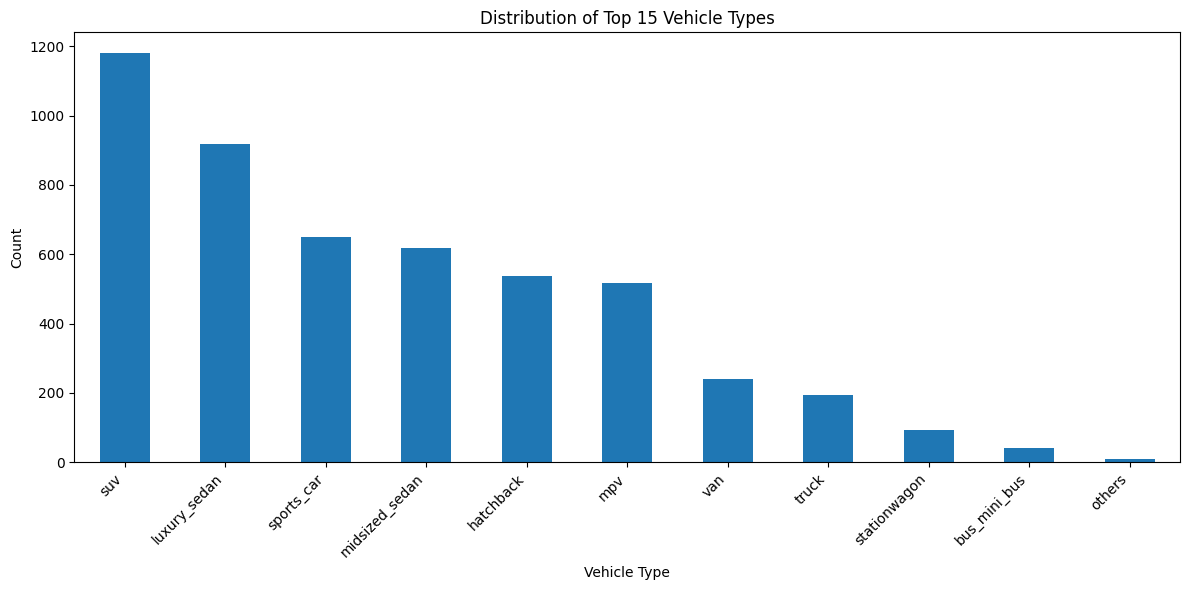

Final number of rows: 5000


In [130]:
def clean_string(s):
    # 转换为小写
    s = s.lower()
    # 将斜杠替换为空格
    s = s.replace('/', '_')
    # 移除反斜杠和其他特殊字符，但保留空格
    s = re.sub(r'[^\w\s]', '', s)
    # 删除多余的空格
    s = re.sub(r'\s+', '_', s)
    # 删除前后的空格
    return s.strip()

# 应用清理函数
data['type_of_vehicle'] = data['type_of_vehicle'].apply(clean_string)

# 分割复合类别
data['type_of_vehicle'] = data['type_of_vehicle'].str.split()
data = data.explode('type_of_vehicle')

# 显示清理后的数据分布
print(data['type_of_vehicle'].value_counts())

# 绘制柱状图
plt.figure(figsize=(12, 6))
top_15 = data['type_of_vehicle'].value_counts().nlargest(15)
top_15.plot(kind='bar')
plt.title('Distribution of Top 15 Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")

In [131]:
data_type_of_vehicle_encoded = pd.get_dummies(data['type_of_vehicle'], prefix='vehicle_type').astype(int)

# 获取 type_of_vehicle 列的索引位置
col_idx = data.columns.get_loc('type_of_vehicle')

# 删除原有的 type_of_vehicle 列
# data.drop('type_of_vehicle', axis=1, inplace=True)

# 将独热编码的列插入到原来 type_of_vehicle 列所在的位置
for i, col in enumerate(data_type_of_vehicle_encoded.columns):
    data.insert(col_idx + i, col, data_type_of_vehicle_encoded[col])
data.head()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")


Final number of rows: 5000


#### 2.1.8: Process of 'category' column

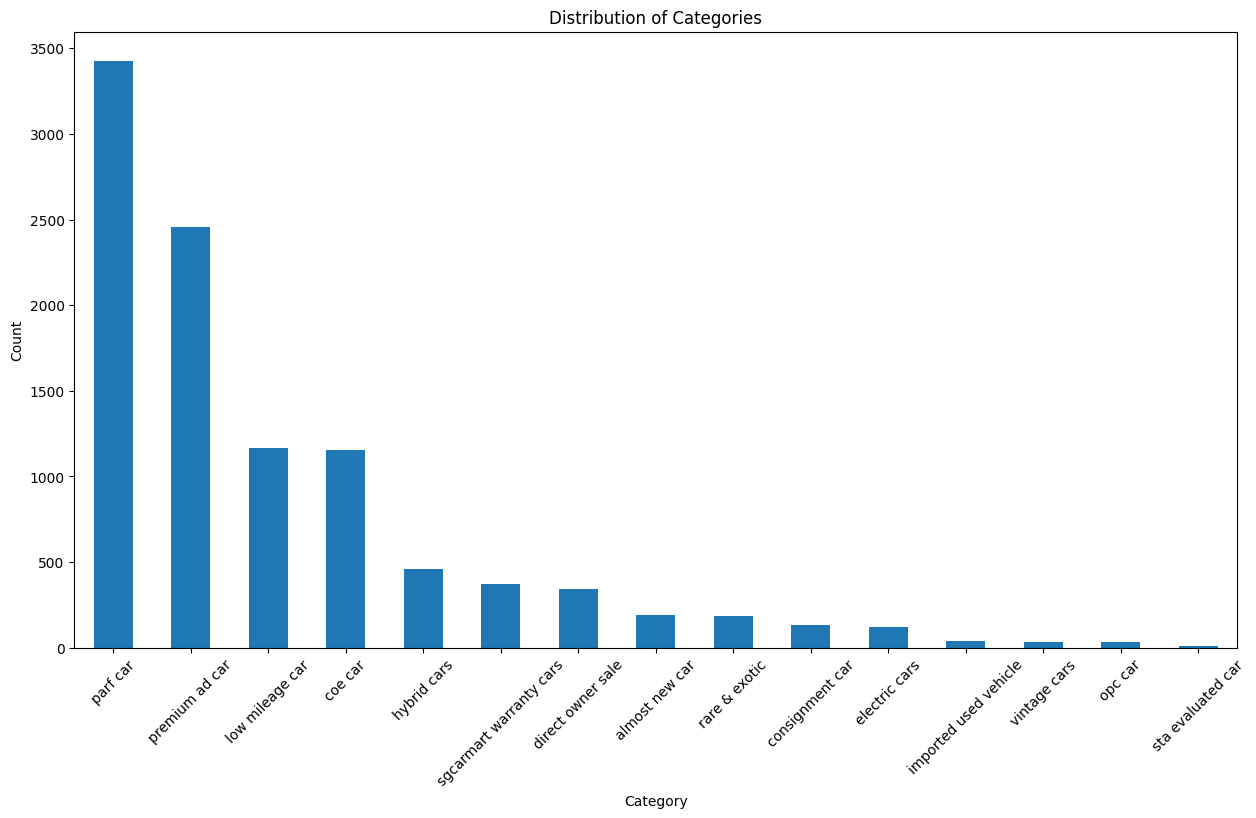

{'premium ad car', 'rare & exotic', 'sgcarmart warranty cars', 'imported used vehicle', 'low mileage car', 'hybrid cars', 'coe car', 'electric cars', 'parf car', 'opc car', 'sta evaluated car', 'direct owner sale', 'almost new car', 'vintage cars', 'consignment car'}
Final number of rows: 5000


In [132]:
# 替换掉 category 列中的 '-'，如果有的话
data['category'] = data['category'].replace('-', '')

# 将 category 列按逗号分割成列表
categories_split = data['category'].apply(lambda x: [item.strip() for item in x.split(',')] if isinstance(x, str) and x else [])

# output all the categories
categories = set([item for sublist in categories_split for item in sublist])

# 统计对应的类别数量，绘制柱状图
category_counts = pd.Series([item for sublist in categories_split for item in sublist]).value_counts()
plt.figure(figsize=(15, 8))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(categories)
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")


In [133]:
# 使用 MultiLabelBinarizer 对类别进行 One-Hot 编码
mlb = MultiLabelBinarizer()
category_encoded = mlb.fit_transform(categories_split)

# 将 One-Hot 编码后的列创建为新的 DataFrame
category_df = pd.DataFrame(category_encoded, columns=[str(c) for c in mlb.classes_])

# 确保 category_df 的索引与 data 一致
category_df = category_df.reset_index(drop=True)
data = data.reset_index(drop=True)

# 获取 category 列的索引位置
col_idx = data.columns.get_loc('category')

# 删除原有的 category 列
data.drop('category', axis=1, inplace=True)

# 将独热编码的列插入到原来 category 列所在的位置
for i, col in enumerate(category_df.columns):
    data.insert(col_idx + i, col, category_df[col])

# 用0填充NaN值，避免转换时出现 NaN 错误
data[mlb.classes_] = data[mlb.classes_].fillna(0)

# 确保所有类型都为整数
data[mlb.classes_] = data[mlb.classes_].astype(int)

# 查看新的 DataFrame
data.head()
final_row_count = len(data)
print(f"Final number of rows: {final_row_count}")

Final number of rows: 5000


#### 2.1.9: Process of 'transmission' column

In [134]:
data['transmission'].value_counts()

auto      4644
manual     356
Name: transmission, dtype: int64

In [135]:
data_transmission_encoded = pd.get_dummies(data['transmission'], prefix='transmission_type').astype(int)

# 获取transmission列的索引位置
col_index = data.columns.get_loc('transmission')

# 删除原有的transmission列
data.drop('transmission',axis=1,inplace=True)

# 将独热编码的列插入到原来的transmission列所在的位置
for i, col in enumerate(data_transmission_encoded.columns):
    data.insert(col_idx + i, col, data_transmission_encoded[col])

In [136]:
data.head()

,make,model,manufactured,vehicle_type_bus_mini_bus,vehicle_type_hatchback,vehicle_type_luxury_sedan,vehicle_type_midsized_sedan,vehicle_type_mpv,vehicle_type_others,vehicle_type_sports_car,...,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,cleaned_title,vehicle_age
0,porsche,macan,2017,0,0,0,0,0,0,0,...,88463.0,131234.0,NaN,NaN,uncategorized,powered by turbocharged 3.0l v6 producing 355h...,"pasm, sports exhaust with valve, lane keeping ...",NaN,Porsche Macan GTS 3.0A PDK Panoramic Roof,6.0
1,honda,vezel,2015,0,0,0,0,0,0,0,...,22421.0,5000.0,NaN,NaN,uncategorized,"sport rims, auto brake hold, sport/eco mode, e...","best commute with economical consumption, with...",NaN,Honda Vezel Hybrid 1.5A X,8.0
2,jaguar,e-pace,2019,0,0,0,0,0,0,0,...,29378.0,33130.0,NaN,NaN,uncategorized,"2.0l inline 4 turbocharged engine, 9 speed jag...","paddle shifters, electrical seat, knockdown re...",NaN,Jaguar E-PACE 2.0A S,3.0
3,audi,q5,2011,0,0,0,0,0,0,0,...,45025.0,45025.0,NaN,NaN,uncategorized,2.ol inline 4 cylinder turbocharged producing ...,"keyless, factory fitted infotainment system, c...",NaN,Audi Q5 2.0A TFSI Quattro,13.0
4,bmw,x1,2021,0,0,0,0,0,0,0,...,39089.0,46725.0,NaN,NaN,uncategorized,bmw twinpower turbo 3 cylinder engine with 140...,"idrive, bluetooth, auto front seats with drive...",NaN,BMW X1 sDrive18i xLine,2.0


**please write code after**

#### 2.1.10: Process of 'curb_weight' column

In [137]:
data, stats = impute_missing_values(data, 'curb_weight', ['engine_cap', 'power', 'road_tax'])
print(f"Final number of rows: {len(data)}")

Available target columns: ['curb_weight']
Missing target columns: set()
Available estimation features: ['engine_cap', 'power', 'road_tax']
Missing estimation features: set()

Processing curb_weight
Initial missing curb_weight values: 71
Determined reasonable minimum value for curb_weight: 217.5
Selected features for estimation: ['engine_cap', 'power', 'road_tax']
After processing, missing curb_weight values: 0
Filled missing values: 71
Small values adjusted: 0

curb_weight statistics:
count     5000.000000
mean      1585.223701
std        797.799323
min        435.000000
25%       1300.000000
50%       1480.000000
75%       1700.000000
max      18080.000000
Name: curb_weight, dtype: float64
Final number of rows: 5000


#### 2.1.11: Process of 'power' column

In [138]:
# Fill null rows using mean values, group by type_of_vehicle
# data['power'] = data.groupby('type_of_vehicle')['power'].transform(lambda x: x.fillna(x.mean()))
data, stats = impute_missing_values(data, 'power', ['engine_cap', 'road_tax','ovm','arf','curb_weight'])


Available target columns: ['power']
Missing target columns: set()
Available estimation features: ['engine_cap', 'road_tax', 'arf', 'curb_weight']
Missing estimation features: {'ovm'}

Processing power
Initial missing power values: 536
Determined reasonable minimum value for power: 1
Selected features for estimation: ['engine_cap', 'road_tax', 'arf', 'curb_weight']
After processing, missing power values: 0
Filled missing values: 536
Small values adjusted: 1

power statistics:
count    5000.000000
mean      136.837670
std        78.901943
min         1.000000
25%        90.000000
50%       110.000000
75%       148.000000
max       735.000000
Name: power, dtype: float64


#### 2.1.12: Process of 'fuel_type' column

In [139]:
data = data.drop(columns=["fuel_type"])

#### 2.1.13: Process of 'engine_cap' column

In [140]:
# Fill null rows using mean values, group by type_of_vehicle
# data['engine_cap'] = data.groupby('type_of_vehicle')['engine_cap'].transform(lambda x: x.fillna(int(x.mean())))
data, stats = impute_missing_values(data, 'engine_cap', ['road_tax','power','curb_weight'])


Available target columns: ['engine_cap']
Missing target columns: set()
Available estimation features: ['road_tax', 'power', 'curb_weight']
Missing estimation features: set()

Processing engine_cap
Initial missing engine_cap values: 120
Determined reasonable minimum value for engine_cap: 323.5
Selected features for estimation: ['road_tax', 'power', 'curb_weight']
After processing, missing engine_cap values: 0
Filled missing values: 120
Small values adjusted: 0

engine_cap statistics:
count     5000.000000
mean      2074.395850
std       1069.085867
min        647.000000
25%       1496.000000
50%       1797.000000
75%       2360.000000
max      15681.000000
Name: engine_cap, dtype: float64


#### 2.1.14: Process of 'no_of_owners' column

In [141]:
data, stats = impute_missing_values(data, 'no_of_owners', ['mileage'])
print(f"Final number of rows: {len(data)}")

# data = data.dropna(subset=["no_of_owners"])

Available target columns: ['no_of_owners']
Missing target columns: set()
Available estimation features: ['mileage']
Missing estimation features: set()

Processing no_of_owners
Initial missing no_of_owners values: 7
Determined reasonable minimum value for no_of_owners: 1
Selected features for estimation: ['mileage']
After processing, missing no_of_owners values: 0
Filled missing values: 7
Small values adjusted: 0

no_of_owners statistics:
count    5000.000000
mean        2.292523
std         1.502196
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: no_of_owners, dtype: float64
Final number of rows: 5000


#### 2.1.15: Process of 'depreciation' column

In [142]:
# data = data.dropna(subset=["depreciation"])
data, stats = impute_missing_values(data, 'depreciation', ['arf','ovm','dereg_value'])
print(f"Final number of rows: {len(data)}")

Available target columns: ['depreciation']
Missing target columns: set()
Available estimation features: ['arf', 'dereg_value']
Missing estimation features: {'ovm'}

Processing depreciation
Initial missing depreciation values: 91
Determined reasonable minimum value for depreciation: 885.0
Selected features for estimation: ['arf', 'dereg_value']
After processing, missing depreciation values: 0
Filled missing values: 91
Small values adjusted: 0

depreciation statistics:
count      5000.000000
mean      20514.391136
std       18352.434930
min        1770.000000
25%       13440.000000
50%       15910.000000
75%       20942.500000
max      262390.000000
Name: depreciation, dtype: float64
Final number of rows: 5000


#### 2.1.16: Process of 'coe' column
No processing needed

#### 2.1.17: Process of 'road_tax' column

In [143]:
# Fill null rows using mean values
# data['road_tax'] = data['road_tax'].fillna(int(data['road_tax'].mean()))
data, stats = impute_missing_values(data, 'road_tax', ['engine_cap','power','omv'])
print(f"Final number of rows: {len(data)}")

Available target columns: ['road_tax']
Missing target columns: set()
Available estimation features: ['engine_cap', 'power', 'omv']
Missing estimation features: set()

Processing road_tax
Initial missing road_tax values: 543
Determined reasonable minimum value for road_tax: 35.0
Selected features for estimation: ['engine_cap', 'power', 'omv']
After processing, missing road_tax values: 0
Filled missing values: 543
Small values adjusted: 0

road_tax statistics:
count     5000.000000
mean      1496.173953
std       1325.088521
min         70.000000
25%        684.000000
50%       1176.000000
75%       1791.000000
max      11781.000000
Name: road_tax, dtype: float64
Final number of rows: 5000


#### 2.1.18: Process of 'dereg_value' column

In [144]:
# data = data.dropna(subset=["dereg_value"])
data, stats = impute_missing_values(data, 'dereg_value', ['arf','ovm','depreciation'])
print(f"Final number of rows: {len(data)}")

Available target columns: ['dereg_value']
Missing target columns: set()
Available estimation features: ['arf', 'depreciation']
Missing estimation features: {'ovm'}

Processing dereg_value
Initial missing dereg_value values: 39
Determined reasonable minimum value for dereg_value: 40.0
Selected features for estimation: ['arf', 'depreciation']
After processing, missing dereg_value values: 0
Filled missing values: 39
Small values adjusted: 0

dereg_value statistics:
count      5000.000000
mean      47341.898788
std       62592.518197
min          80.000000
25%       18211.250000
50%       29309.000000
75%       53568.250000
max      942520.000000
Name: dereg_value, dtype: float64
Final number of rows: 5000


#### 2.1.19: Process of 'mileage' column

In [145]:
data = data.drop(columns=["mileage"])

#### 2.1.20: Process of 'omv' column

In [146]:
# data = data.dropna(subset=["omv"])
data, stats = impute_missing_values(data, 'omv', ['arf','power','road_tax','dereg_value'])
print(f"Final number of rows: {len(data)}")

Available target columns: ['omv']
Missing target columns: set()
Available estimation features: ['arf', 'power', 'road_tax', 'dereg_value']
Missing estimation features: set()

Processing omv
Initial missing omv values: 14
Determined reasonable minimum value for omv: 1495.0
Selected features for estimation: ['arf', 'power', 'road_tax', 'dereg_value']
After processing, missing omv values: 0
Filled missing values: 14
Small values adjusted: 0

omv statistics:
count      5000.000000
mean      41564.034864
std       47662.362102
min        2990.000000
25%       19955.000000
50%       28553.500000
75%       43010.750000
max      698313.000000
Name: omv, dtype: float64
Final number of rows: 5000


#### 2.1.21: Process of 'arf' column

In [147]:
# data = data.dropna(subset=["arf"])
data, stats = impute_missing_values(data, 'arf', ['omv','power','road_tax','dereg_value'])
print(f"Final number of rows: {len(data)}")

Available target columns: ['arf']
Missing target columns: set()
Available estimation features: ['omv', 'power', 'road_tax', 'dereg_value']
Missing estimation features: set()

Processing arf
Initial missing arf values: 30
Determined reasonable minimum value for arf: 13.0
Selected features for estimation: ['omv', 'power', 'road_tax', 'dereg_value']
After processing, missing arf values: 0
Filled missing values: 30
Small values adjusted: 0

arf statistics:
count    5.000000e+03
mean     4.496085e+04
std      7.742653e+04
min      2.600000e+01
25%      1.367300e+04
50%      2.509700e+04
75%      4.670475e+04
max      1.228960e+06
Name: arf, dtype: float64
Final number of rows: 5000


#### 2.1.22: Process of 'opc_scheme' column

In [148]:
data = data.drop(columns=["opc_scheme"])

#### 2.1.23: Process of 'lifespan' column

In [149]:
data = data.drop(columns=["lifespan"])

#### 2.1.24: Process of 'eco_category' column

In [150]:
data = data.drop(columns=["eco_category"])

#### 2.1.25: Process of 'features' column

In [151]:
data = data.drop(columns=["features"])

#### 2.1.26: Process of 'accessories' column

In [152]:
data = data.drop(columns=["accessories"])

#### 2.1.27: Process of 'indicative_price' column

In [153]:
data = data.drop(columns=["indicative_price"])
# 删除原有的 type_of_vehicle 列
data.drop('type_of_vehicle', axis=1, inplace=True)
data.drop('cleaned_title', axis=1, inplace=True)
data.drop('make', axis=1, inplace=True)
data.drop('model', axis=1, inplace=True)

save the train_cleaned.csv

In [154]:
current_dir = os.getcwd()
save_filename = 'test_cleaned.csv'
save_filepath = os.path.join(current_dir, save_filename)
data.to_csv(save_filepath)